# Getting Started with Images

This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

* Reading an image 
* Check image attributes like datatype and shape 
* Matrix representation of an image in Numpy
* Color Images and splitting/merging image channels
* Displaying images using matplotlib
* Saving images

# Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# to display images in notebook
%matplotlib inline
from IPython.display import Image

# Display image directly

We will use the following as our sample images. We will use ipython image function to load and display image.

In [3]:
# Display 18 X 18 pixel image.
Image(filename='checkerboard_18x18.png')

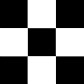

In [4]:
# Display 18 X 18 pixel image.
Image(filename='checkerboard_84x84.jpg')


# <font style="color:black">Reading images using OpenCV</font>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

**`Imread:`**https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56

**`ImreadModes:`** https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80


In [5]:
# Read image as gray scale.
cb_img = cv2.imread('checkerboard_18x18.png',0) # returns numpy 2D array.

# Print the image data (pixel values), element of 2D numpy array.
# Each pixel value is of 8-bits [0, 255].
print(cb_img) # 18 rows and 18 cols

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [6]:
# Print the size of image.
print("Image size: ", cb_img.shape)

# Print the data type of image.
print("Image data type: ", cb_img.dtype)  

Image size:  (18, 18)
Image data type:  uint8


# Display image using Matplotlib

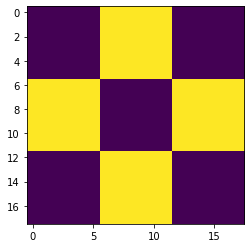

In [7]:
# Display image.
plt.imshow(cb_img)

In [8]:
# Not black n white as expected
# 18 x 18 pixels

### What happened?
Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

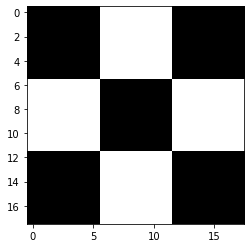

In [9]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')

# Another example

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

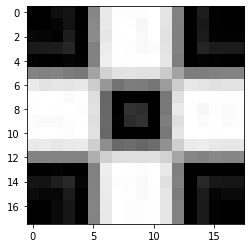

In [12]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg",0)

# Print image.
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap='gray')

## Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

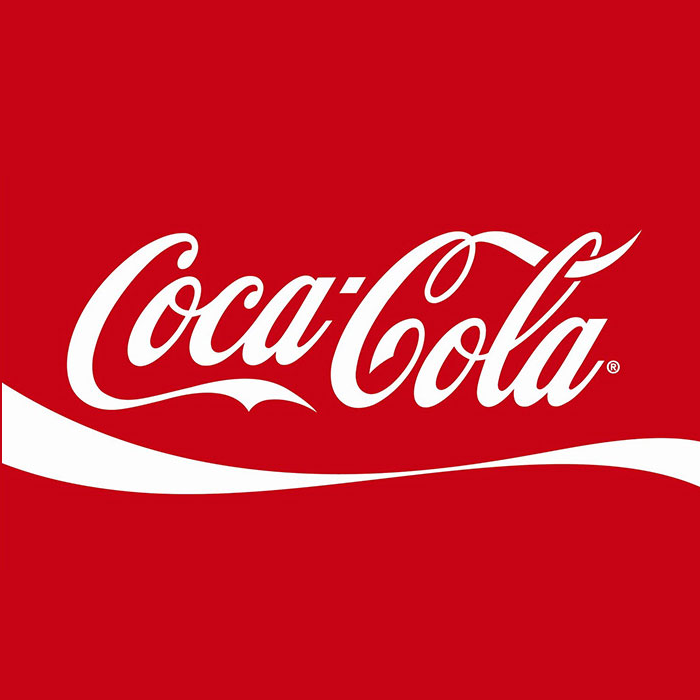

In [14]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

In [26]:
# Read a color image
coke_img = cv2.imread("coca-cola-logo.png",1)

# Print the size of image
print("Image size is ",coke_img.shape)

# Print the data type of image
print("Data type is ",coke_img.dtype)

Image size is  (700, 700, 3)
Data type is  uint8


# Display the image

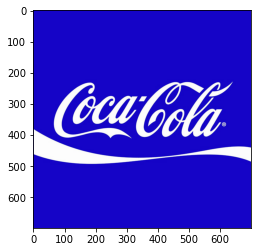

In [27]:
plt.imshow(coke_img)
# because of bgr format color channel order 

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

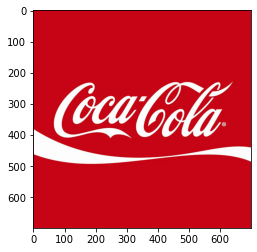

In [28]:
# Reversing the color channel order.

coke_img_channel_reversed = coke_img[:,:,::-1]
plt.imshow(coke_img_channel_reversed)

## Splitting and Merging Color Channels


**`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

**`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a


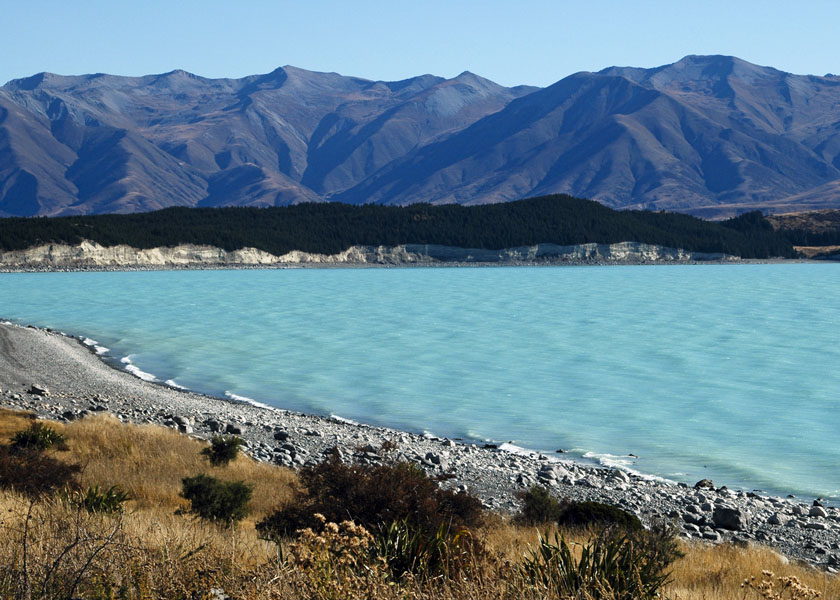

In [37]:
# Display a image.
Image("New_Zealand_Lake.jpg")

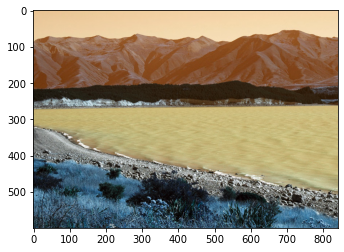

In [38]:
# Read a New_Zealand_Lake
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg",cv2.IMREAD_COLOR)

# Display img_NZ_bgr
plt.imshow(img_NZ_bgr)

In [40]:
# Split the image into the B, G, R components
b, g, r = cv2.split(img_NZ_bgr)

Text(0.5, 1.0, 'Red Channel')

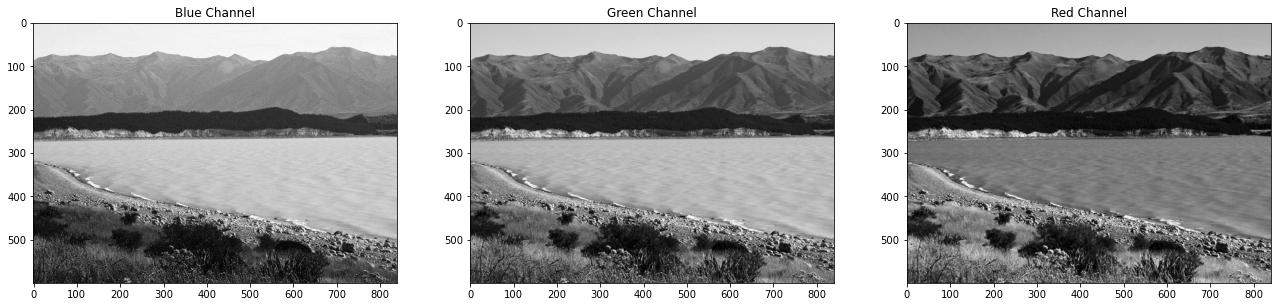

In [63]:
# Show the channels
plt.figure(figsize=[30,10])

plt.subplot(141);
plt.imshow(b,cmap='gray');plt.title("Blue Channel")

plt.subplot(142);
plt.imshow(g,cmap='gray');plt.title("Green Channel")

plt.subplot(143);
plt.imshow(r,cmap='gray');plt.title("Red Channel")

In [54]:
# Merge the individual channel into a BGR image
imgMerged = cv2.merge((b,g,r))

Text(0.5, 1.0, 'Merged Output')

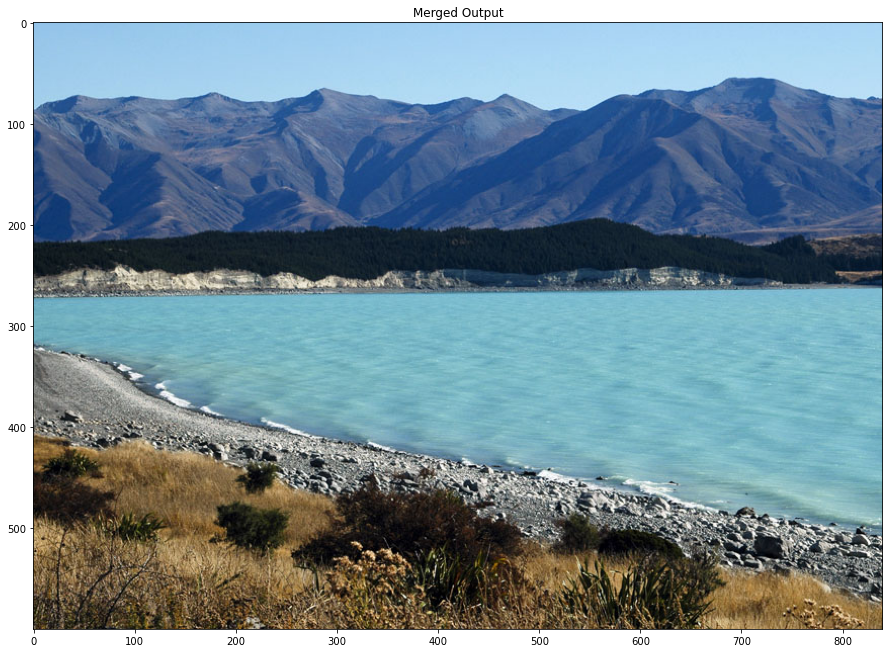

In [64]:
# Show the merged output.
plt.figure(figsize=[70,20])
plt.subplot(144);
plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output")

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
2. `code` color space conversion code (see ColorConversionCodes). 

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`cv2.cvtColor:`** https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
**`ColorConversionCodes:`** https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0

# Changing from BGR to RGB

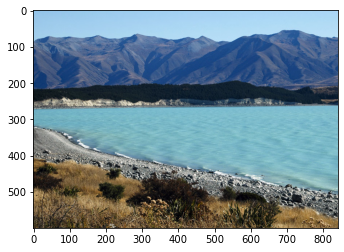

In [67]:
# OpenCV stores color channels in a different than the most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

# Changing to HSV color space

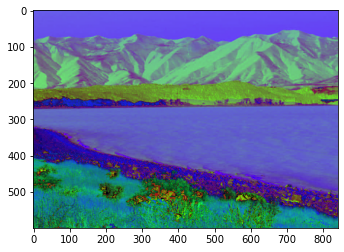

In [69]:
# BGR to HSV
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Display img_hsv
plt.imshow(img_hsv)

In [71]:
# Split the image into the H, S, V components
h, s, v = cv2.split(img_hsv)

Text(0.5, 1.0, 'Value Channel')

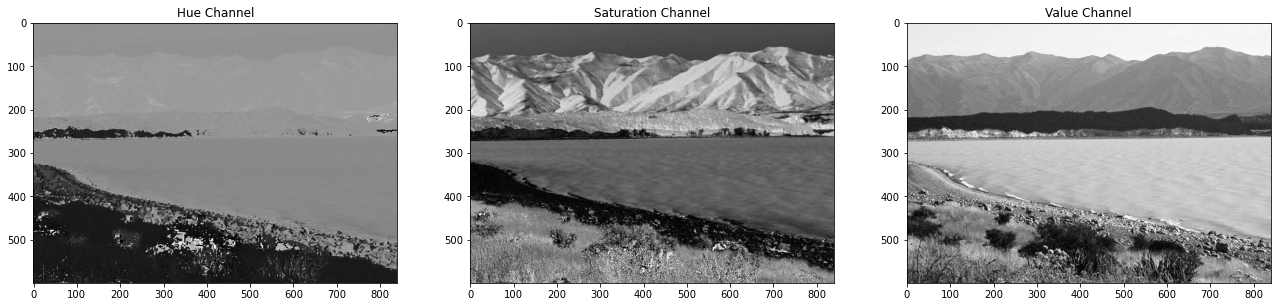

In [73]:
# Show the channels
plt.figure(figsize=[30,10])

plt.subplot(141);
plt.imshow(h,cmap='gray');plt.title("Hue Channel") # represent color of the image

plt.subplot(142);
plt.imshow(s,cmap='gray');plt.title("Saturation Channel") # represent intensity of the image

plt.subplot(143);
plt.imshow(v,cmap='gray');plt.title("Value Channel") # represent value (light or dark) of the image

In [74]:
# Merge the individual channel into a HSV image
imgMerged = cv2.merge((h,s,v))

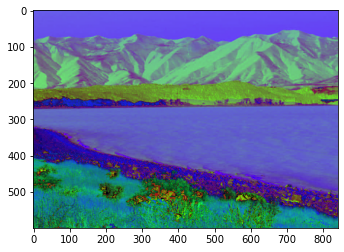

In [76]:
# Show the merged output.
plt.imshow(imgMerged)

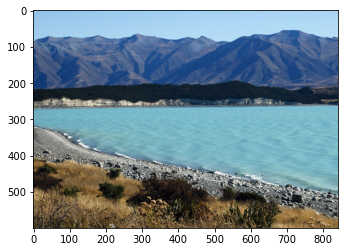

In [81]:
# Converting HSV to RGB
img_NZ_new_rgb = cv2.cvtColor(imgMerged, cv2.COLOR_HSV2RGB)

# Display img_NZ_new_rgb
plt.imshow(img_NZ_new_rgb)

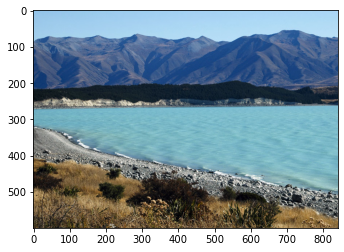

In [78]:
# Show the original output.
plt.imshow(img_NZ_rgb)

# Modify individual channel

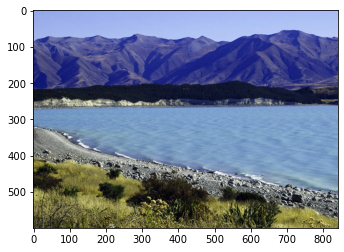

In [84]:
# Increasing the value of Hue -> h

h_new = h + 10
img_NZ_new_hue = cv2.merge((h_new, s, v))
img_NZ_new_hue_rgb = cv2.cvtColor(img_NZ_new_hue, cv2.COLOR_HSV2RGB)
plt.imshow(img_NZ_new_hue_rgb)

Text(0.5, 1.0, 'Hue Channel')

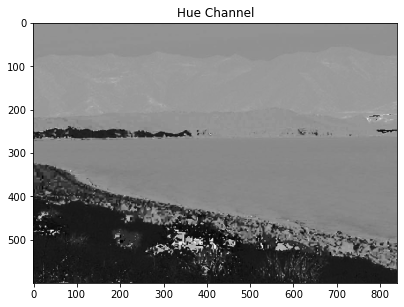

In [86]:
# Show the channels
plt.figure(figsize=[30,10])

plt.subplot(141);
plt.imshow(h_new,cmap='gray');plt.title("Hue Channel") # represent color of the image

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

	
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path. 
2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`Imwrite:`** https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce
**`ImwriteFlags:`**https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac

In [99]:
# Save a image 
cv2.imwrite("IMG_NZ_RGB.png", img_NZ_bgr) 

True

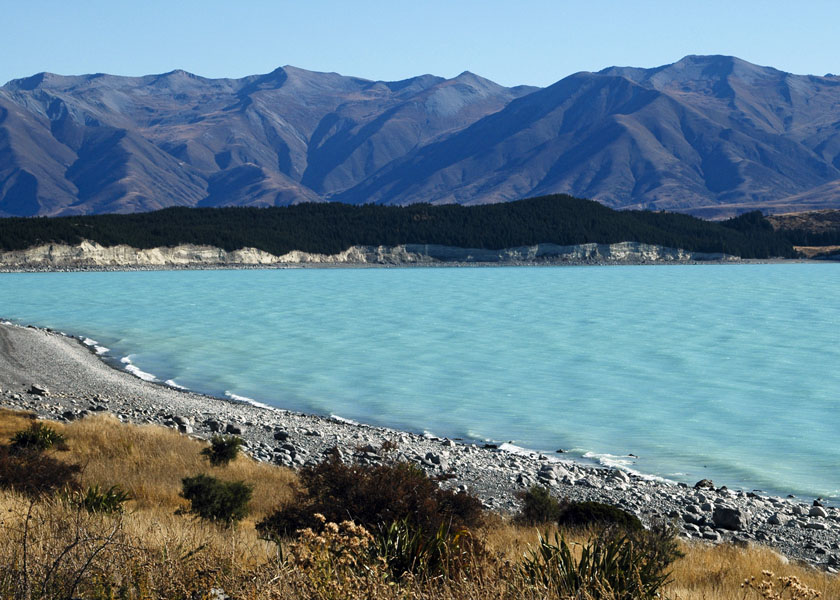

In [100]:
Image(filename="IMG_NZ_RGB.png")

In [101]:
# Read image as Color.
img_NZ_bgr = cv2.imread("IMG_NZ_RGB.png", cv2.IMREAD_COLOR)
print("Color image shape is ",img_NZ_bgr.shape)

# Read image as GrayScaled
img_NZ_gry = cv2.imread("IMG_NZ_RGB.png", cv2.IMREAD_GRAYSCALE)
print("Gray image shape is ",img_NZ_gry.shape)

Color image shape is  (600, 840, 3)
Gray image shape is  (600, 840)
